In [16]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


In [17]:
using Imbalance

# set probability of each class
class_probs = [0.5, 0.2, 0.3]                         
num_rows, num_continuous_feats = 100, 5
# generate a table and categorical vector accordingly
X, y = generate_imbalanced_data(num_rows, num_continuous_feats; 
                                class_probs, rng=42)                       
checkbalance(y; ref="minority")

# apply enn undersampling
X_under, y_under = tomek_undersample(X, y; min_ratios=1.0, rng=42)
checkbalance(y_under;  ref="minority")

1: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 19 (100.0%) 
2: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 33 (173.7%) 
0: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 48 (252.6%) 
1: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 19 (100.0%) 
2: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 33 (173.7%) 
0: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 48 (252.6%) 


### 1. Generate Random Data

In [18]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; class_probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; class_probs, type, rng=42)

((Column1 = [-0.0028447406721596527, 0.053396975720629875, 0.061016450380274076, 0.06209464455353217, 0.29658926814049713, -0.04291495575825549, -0.04273516840802796, 0.5366317462032143, 0.67371784961202, -0.05817244411256185  …  0.9331423778772872, 0.09744161988062086, 0.4785727461872523, 0.010818218987245259, -0.06576751584034947, 0.47914400073887753, 0.43244988381454963, 0.09494170048000555, 0.822151762522241, 0.06160201273781397], Column2 = [0.2648100466362068, 0.0683935237272883, 0.010720076798523853, 0.02908855015294696, 1.0431932357242495, -0.10898021846215913, 0.007375825680225642, 2.0621593203338096, 1.6317930426434377, -0.09300588605566124  …  1.8356664751007685, 0.026015201042793312, 1.6988806735080806, -0.08647559500155733, 0.1491659516723411, 1.7477597049481188, 0.9998759715926963, 0.23536290953884406, 1.6706744078040872, 0.19110214743779141], Column3 = [0.5434523601944163, 0.7696454032111112, 0.48192052411145336, 0.9581390531835989, 0.2819078412750898, 0.8377559791594172,

### 2. Apply Random Undersampler

#### Using Imbalance Only

In [19]:
X_under, y_under = random_undersample(X, y; ratios = Dict(0=>1.0, 1=> 1.0, 2=>0.9), rng = 42)

((Column1 = [-0.0028447406721596527, 0.061016450380274076, -0.04291495575825549, -0.04273516840802796, -0.05817244411256185, 0.07659741077646531, 0.012406120014943553, 0.040521990253102935, 0.004298035201088863, 0.09744161988062086  …  0.5366317462032143, 0.67371784961202, 0.672738025392336, 0.814599373088737, 0.570815568825679, 0.5736499926477288, 0.9331423778772872, 0.4785727461872523, 0.47914400073887753, 0.822151762522241], Column2 = [0.2648100466362068, 0.010720076798523853, -0.10898021846215913, 0.007375825680225642, -0.09300588605566124, 0.24347469452473533, -0.1113078457522455, 0.33696189971850915, -0.03862717419249238, 0.026015201042793312  …  2.0621593203338096, 1.6317930426434377, 2.1607362273201423, 1.8855325576801358, 1.8289935780325643, 1.6575937145974902, 1.8356664751007685, 1.6988806735080806, 1.7477597049481188, 1.6706744078040872], Column3 = [0.5434523601944163, 0.48192052411145336, 0.8377559791594172, 0.5512903058360686, 0.7636395568753396, 0.7530990626961812, 0.5725

#### Using MLJ

In [20]:
naive_model = Imbalance.MLJ.RandomUndersampler(ratios=Dict(0=>1.0, 1=> 1.0, 2=>0.9), rng=42)
mach = machine(naive_model)
X_under, y_under = transform(mach, X, y)

((Column1 = [-0.0028447406721596527, 0.061016450380274076, -0.04291495575825549, -0.04273516840802796, -0.05817244411256185, 0.07659741077646531, 0.012406120014943553, 0.040521990253102935, 0.004298035201088863, 0.09744161988062086  …  0.5366317462032143, 0.67371784961202, 0.672738025392336, 0.814599373088737, 0.570815568825679, 0.5736499926477288, 0.9331423778772872, 0.4785727461872523, 0.47914400073887753, 0.822151762522241], Column2 = [0.2648100466362068, 0.010720076798523853, -0.10898021846215913, 0.007375825680225642, -0.09300588605566124, 0.24347469452473533, -0.1113078457522455, 0.33696189971850915, -0.03862717419249238, 0.026015201042793312  …  2.0621593203338096, 1.6317930426434377, 2.1607362273201423, 1.8855325576801358, 1.8289935780325643, 1.6575937145974902, 1.8356664751007685, 1.6988806735080806, 1.7477597049481188, 1.6706744078040872], Column3 = [0.5434523601944163, 0.48192052411145336, 0.8377559791594172, 0.5512903058360686, 0.7636395568753396, 0.7530990626961812, 0.5725

#### Using TableTransforms

In [21]:
using Imbalance: TableTransforms.RandomUndersampler
naive_model_t = RandomUndersampler(y_ind, ratios=Dict(0=>1.0, 1=> 0.9, 2=>1.0), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [0.03280427385736327, 0.03655573789592753, 0.020879940276946948, -0.0013581999591439561, -0.04407634086629726, 0.005303766690445421, -0.04918946253332114, 0.017789936088273114, 0.08892983795750184, 0.07022792018983272  …  0.9091584894163469, 0.45379069882481926, 1.0112798283095634, 0.5411305341711674, 0.7592707759921626, 0.5393939896614858, 0.6932485764081905, 0.7692694029432127, 0.6593198424186956, 0.40983015219455],
 Column2 = [0.09112452265065774, 0.01199657643226304, 0.1709192537779845, 0.34328231757630745, 0.07970646461894479, -0.07311258883175539, 0.02394323006397929, 0.17285467261497206, -0.40763582388422465, -0.17636600796084634  …  1.498165578175992, 1.4949783000628751, 1.9379909521544623, 1.787801316873967, 1.9673227227302268, 1.6249117370474795, 1.7464618041139661, 1.6876245842071618, 1.6939084355427383, 1.782634270192463],
 Column3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.988891412780

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


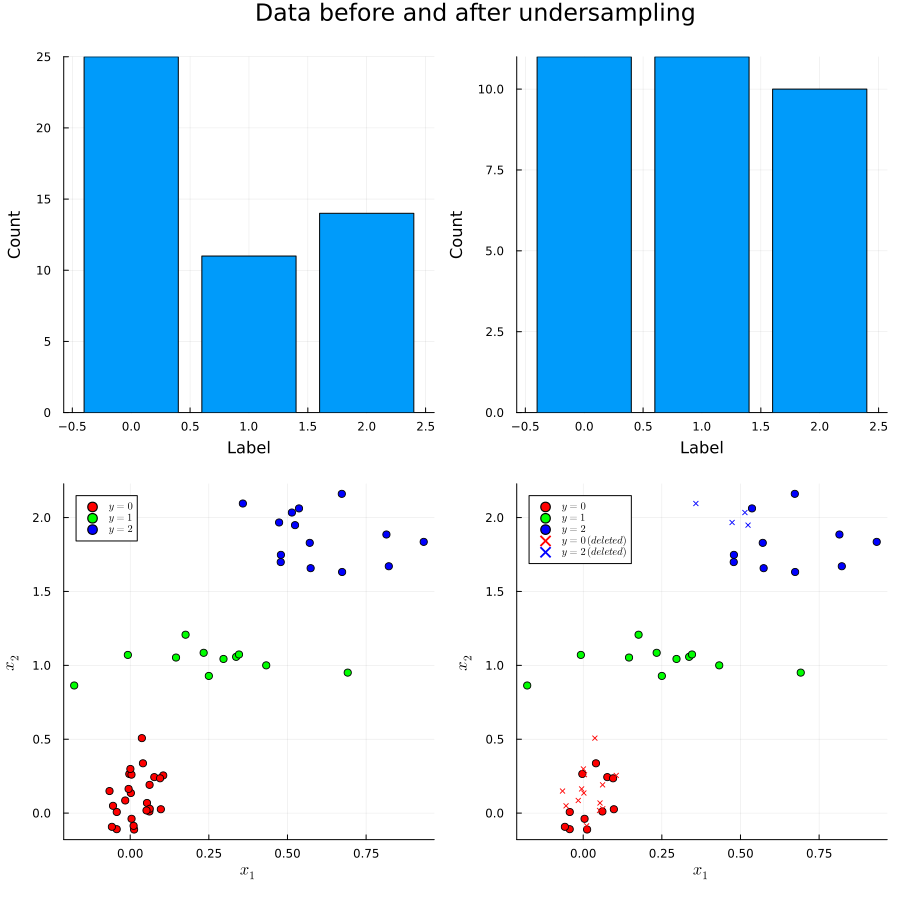

In [22]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, y_under, X, X_under; show_deleted=true)